<a href="https://colab.research.google.com/github/fmarquezf/MetNumUN2021I/blob/main/Lab13/fmarquezAlgorithmicToolboxWeek7InitialValueProblemOrdinaryDifferentialEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

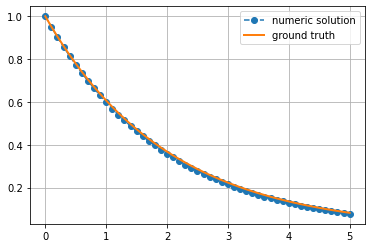

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

In [4]:
# ... ENTER YOUR CODE HERE ...
from sklearn.metrics import mean_absolute_error
lam = -0.5
DT = [5, 2, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05]
for dt in DT:
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=dt)
    print("dt =", dt, "- Error =", mean_absolute_error(np.exp(lam*tt), y))

dt = 5 - Error = 0.7910424993119494
dt = 2 - Error = 0.16773824146935168
dt = 1 - Error = 0.07436842381550283
dt = 0.1 - Error = 0.007159245952545797
dt = 0.01 - Error = 0.0007130252805831734
dt = 0.001 - Error = 7.127347876430624e-05
dt = 0.0001 - Error = 7.127057334425005e-06
dt = 1e-05 - Error = 7.12703222294634e-07


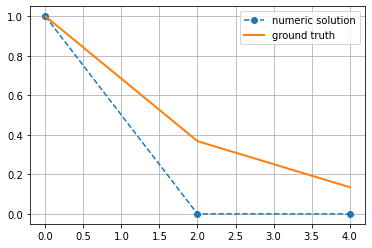

In [5]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt= 2)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [6]:
# ... ENTER YOUR CODE AND DISCUSSION HERE ...
def implicit_euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an implicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / ( 1 - dt*lam)
    return tt, y

In [7]:
from sklearn.metrics import mean_absolute_error
lam = -0.5
DT = [5, 2, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05]
for dt in DT:
    tt, y = implicit_euler_solve(lam, u0=1.0, T=5, dt=dt)
    print("dt =", dt, "- Error =", mean_absolute_error(np.exp(lam*tt), y))

dt = 5 - Error = 0.10181464354519346
dt = 2 - Error = 0.08226175853064832
dt = 1 - Error = 0.05361082858504584
dt = 0.1 - Error = 0.006916832298629263
dt = 0.01 - Error = 0.0007105595818793266
dt = 0.001 - Error = 7.12487793649636e-05
dt = 0.0001 - Error = 7.126809695002605e-06
dt = 1e-05 - Error = 7.126988830601425e-07


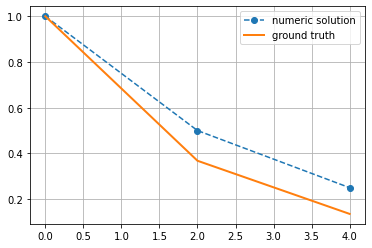

In [8]:
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=5, dt= 2)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

The Implicit Euler scheme works better for solving the equation, specially when $|\lambda| \tau > 1$


## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [9]:
# ... ENTER YOUR CODE HERE ...
def stiff_euler_solve(A, u, T, dt):
    """Solve $du/dt =  Au$ on $0 < t < T$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u.shape[0]))
    y[0] = u
    for k in range(num_steps):
        y[k+1] = y[k] + dt*A@y[k]
    return tt, y[0:,0], y[0:,1]

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

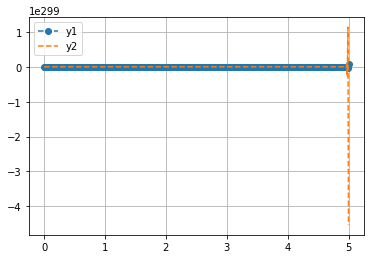

In [10]:
# ... ENTER YOUR CODE HERE ...
u = np.array([1,0]).T
A = np.array([[-10,10],
             [32, -499]])
tt, y1, y2 = stiff_euler_solve(A, u, T=5, dt= 0.01)
plt.plot(tt, y1, 'o--', label='y1')
plt.plot(tt, y2, '--', label='y2')
plt.legend(loc='best')
plt.grid(True)

The explicit Euler's method is not stable at $\tau = 0.01$




In [11]:
np.linalg.eigvals(A)

array([  -9.34647667, -499.65352333])

This system is stiff because $\lambda_2 	\gg \lambda_1$

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [12]:
def implicit_stiff_euler_solve(A, u, T, dt):
    """Solve $du/dt =  Au$ on $0 < t < T$ via an implicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u.shape[0]))
    y[0] = u
    for k in range(num_steps):
      y[k+1] = np.linalg.solve((np.eye(A.shape[0])-dt*A), y[k])
    return tt, y[0:,0], y[0:,1]

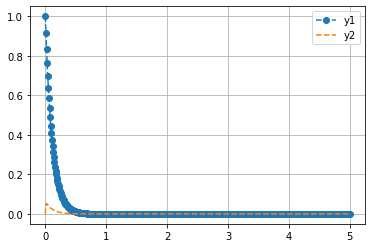

In [13]:
u = np.array([1,0]).T
A = np.array([[-10,10],
             [32, -499]])
tt, y1, y2 = implicit_stiff_euler_solve(A, u, T=5, dt= 0.01)
plt.plot(tt, y1, 'o--', label='y1')
plt.plot(tt, y2, '--', label='y2')
plt.legend(loc='best')
plt.grid(True)

The implicit Euler's method is much more effective than the explicit Euler's method to solve this system, specially at $\tau=0.01$

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

In [14]:
# ... ENTER YOUR CODE HERE ...
def oscilating_pendulum_ODE(func, w, u, T, dt):
  A = np.array([[0,1],[-(w**2),0]])
  return func(A, u, T, dt)

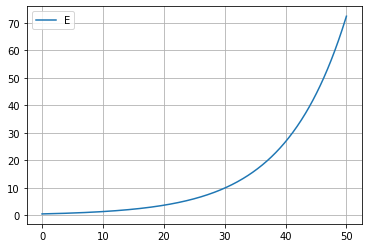

In [15]:
E = lambda u, du, w: (du**2)/2 + (w**2)*(u**2)/2
tt, y1, y2 = oscilating_pendulum_ODE(stiff_euler_solve, 1, np.array([1,0]),T= 50, dt = 0.1)
tt_y = E(y1, y2, 1)
plt.plot(tt, tt_y, '-', label='E')
plt.legend(loc='best')
plt.grid(True)

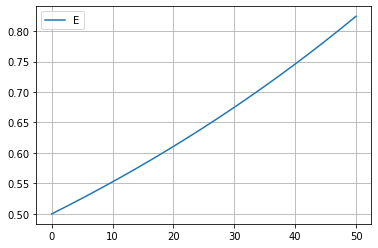

In [16]:
E = lambda u, du, w: (du**2)/2 + (w**2)*(u**2)/2
tt, y1, y2 = oscilating_pendulum_ODE(stiff_euler_solve, 1, np.array([1,0]),T= 50, dt = 0.01)
tt_y = E(y1, y2, 1)
plt.plot(tt, tt_y, '-', label='E')
plt.legend(loc='best')
plt.grid(True)

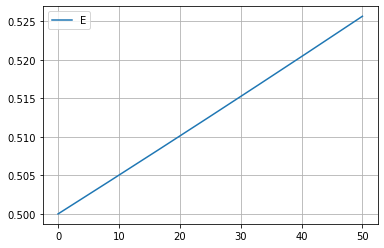

In [17]:
E = lambda u, du, w: (du**2)/2 + (w**2)*(u**2)/2
tt, y1, y2 = oscilating_pendulum_ODE(stiff_euler_solve, 1, np.array([1,0]),T= 50, dt = 0.001)
tt_y = E(y1, y2, 1)
plt.plot(tt, tt_y, '-', label='E')
plt.legend(loc='best')
plt.grid(True)

The explicit Euler's scheme begins to conserve energy from $\tau = 0.01$ with $T = 50$

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [18]:
# ... ENTER YOUR CODE HERE ...
def Runge_Kutta(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u0.shape[0]))
    y[0] = u0
    for k in range(num_steps):
        a1 = A@y[k]
        a2 = A@(y[k]+dt/2*a1)
        y[k+1] = dt*a2+y[k]
    return tt, y[0:,0], y[0:,1]

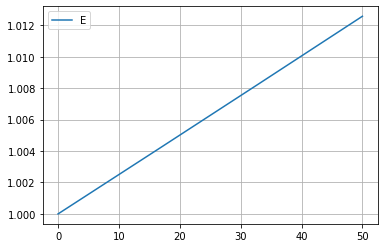

In [19]:
E = lambda u, du, w: (du**2)/2 + (w**2)*(u**2)/2
tt, y1, y2 = oscilating_pendulum_ODE(Runge_Kutta, 1, np.array([1,1]), T=50, dt=0.1)
tt_y = E(y1, y2, 1)
plt.plot(tt, tt_y, '-', label='E')
plt.legend(loc='best')
plt.grid(True)

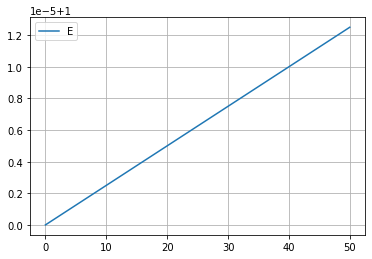

In [20]:
E = lambda u, du, w: (du**2)/2 + (w**2)*(u**2)/2
tt, y1, y2 = oscilating_pendulum_ODE(Runge_Kutta, 1, np.array([1,1]), T=50, dt=0.01)
tt_y = E(y1, y2, 1)
plt.plot(tt, tt_y, '-', label='E')
plt.legend(loc='best')
plt.grid(True)

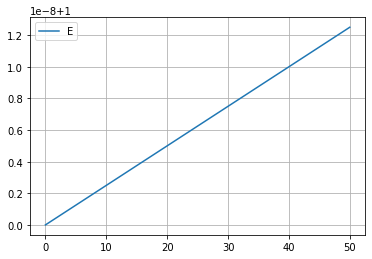

In [21]:
E = lambda u, du, w: (du**2)/2 + (w**2)*(u**2)/2
tt, y1, y2 = oscilating_pendulum_ODE(Runge_Kutta, 1, np.array([1,1]), T=50, dt=0.001)
tt_y = E(y1, y2, 1)
plt.plot(tt, tt_y, '-', label='E')
plt.legend(loc='best')
plt.grid(True)

The Runge-kutta scheme has a better conservation of energy than the explicit Euler's scheme